In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 超参数
batch_size = 64
nz = 100
ngf = 64
ndf = 64
nc = 3
num_epochs = 10
lr = 0.0002
beta1 = 0.5


# 定义生成器
class Generator(nn.Module):
    def __init__(self, nz, ngf, nc):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

In [9]:
#reload generator model
generator = Generator(nz, ngf, nc).to(device)
generator.load_state_dict(torch.load('generator.pth'))
generator.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

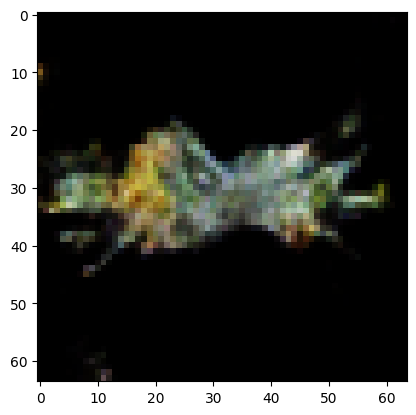

In [11]:
#generate image
import matplotlib.pyplot as plt
import numpy as np

# 设置随机种子以获得可重复的结果
torch.manual_seed(42)

# 创建随机噪声
noise = torch.randn(1, nz, 1, 1).to(device)

# 使用生成器生成图像
with torch.no_grad():
    fake_image = generator(noise)

# 将图像从 Tensor 转换为 NumPy 数组，并将值缩放到 [0, 1] 范围
fake_image_np = fake_image.cpu().numpy()[0]
fake_image_np = (fake_image_np + 1) / 2

# 显示生成的图像
plt.imshow(np.transpose(fake_image_np, (1, 2, 0)))
plt.show()


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.3 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.2 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
